In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'data/2/air_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Start_time      15000 non-null  object 
 1   End_time        15000 non-null  object 
 2   Fare            14989 non-null  float64
 3   City            14490 non-null  object 
 4   Age             14907 non-null  float64
 5   Flight_count    15000 non-null  int64  
 6   Avg_discount    15000 non-null  float64
 7   Flight_mileage  15000 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 937.6+ KB


In [4]:
data.head()

,Start_time,End_time,Fare,City,Age,Flight_count,Avg_discount,Flight_mileage
0,2011/08/18,2014/03/31,5860.0,.,35.0,10,0.973129,12560
1,2011/01/13,2014/03/31,5561.0,佛山,35.0,12,0.575906,21223
2,2012/08/15,2014/03/31,1089.0,北京,33.0,9,0.635025,19246
3,2012/10/17,2014/03/31,9626.0,绍兴县,53.0,7,0.868571,14070
4,2011/09/04,2014/03/31,4473.0,上海,34.0,13,0.703419,17373


In [5]:
data.describe()

,Fare,Age,Flight_count,Avg_discount,Flight_mileage
count,14989.000000,14907.000000,15000.000000,15000.000000,15000.000000
mean,3761.743812,42.569531,9.057600,0.728391,12395.706800
std,2720.206579,9.807385,3.946338,0.163550,3588.357291
min,0.000000,16.000000,2.000000,0.136017,4040.000000
25%,1709.000000,35.000000,6.000000,0.625525,9747.000000
50%,3580.000000,41.000000,8.000000,0.713322,11986.500000
75%,5452.000000,48.000000,11.000000,0.803840,14654.000000
max,36602.000000,110.000000,47.000000,1.500000,50758.000000


In [6]:
data = data[data.Fare.notnull() & data.Fare != 0]

In [7]:
data.describe()

,Fare,Age,Flight_count,Avg_discount,Flight_mileage
count,13279.000000,13199.000000,13279.000000,13279.000000,13279.000000
mean,4246.161458,42.689219,9.245500,0.726065,12491.482792
std,2509.062979,9.833271,3.934772,0.160491,3596.446668
min,173.000000,16.000000,2.000000,0.136017,4040.000000
25%,2400.000000,35.000000,7.000000,0.624644,9832.500000
50%,3981.000000,41.000000,9.000000,0.712388,12100.000000
75%,5697.000000,48.000000,11.000000,0.803339,14749.000000
max,36602.000000,110.000000,47.000000,1.500000,50758.000000


In [8]:
for index, item in data.iterrows():
    start_year, start_month = item['Start_time'].split('/')[:2]
    end_year, end_month = item['End_time'].split('/')[:2]
    data.loc[index,'Months'] = (int(end_year)-int(start_year))*12 + (int(end_month)-int(start_month))

In [9]:
data.drop(['Start_time','End_time'],axis=1, inplace=True)
data.drop(['City'], axis=1, inplace=True)
data = (data - data.mean(axis=0))/ data.std(axis=0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13279 entries, 0 to 14998
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fare            13279 non-null  float64
 1   Age             13199 non-null  float64
 2   Flight_count    13279 non-null  float64
 3   Avg_discount    13279 non-null  float64
 4   Flight_mileage  13279 non-null  float64
 5   Months          13279 non-null  float64
dtypes: float64(6)
memory usage: 1.2 MB


In [11]:
data.head()

,Fare,Age,Flight_count,Avg_discount,Flight_mileage,Months
0,0.643204,-0.781959,0.191752,1.539425,0.019051,-0.616333
1,0.524036,-0.781959,0.700041,-0.935625,2.427818,-0.357005
2,-1.258303,-0.985351,-0.062393,-0.567261,1.878109,-1.060895
3,2.144162,1.048561,-0.570681,0.887939,0.438910,-1.134989
4,0.090408,-0.883655,0.954185,-0.141105,1.357317,-0.653379


<AxesSubplot: title={'center': 'Pearson Correlation of Features'}>

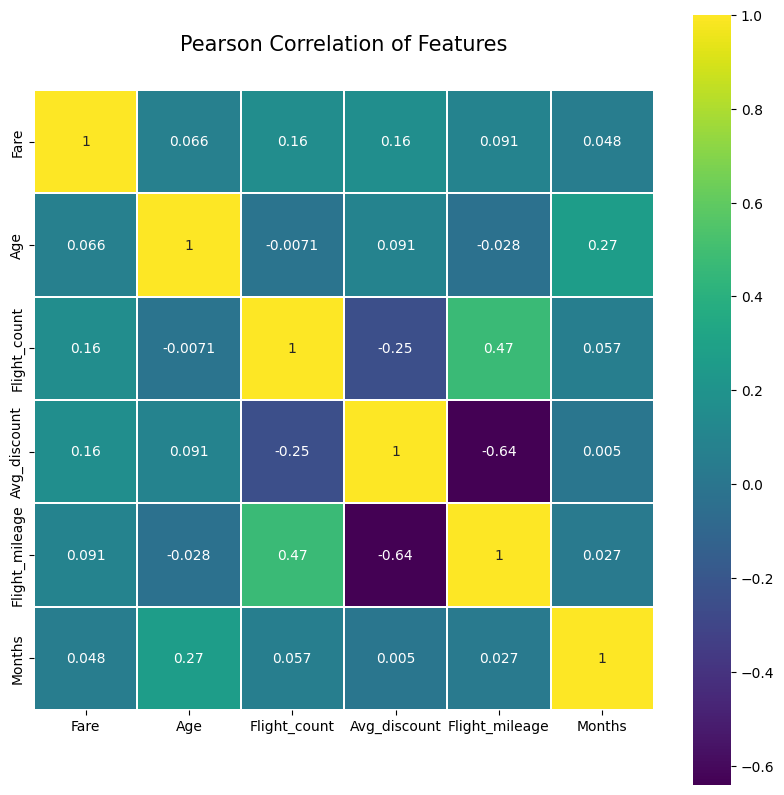

In [12]:
plt.figure(figsize=(10,10))
plt.title("Pearson Correlation of Features", y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=plt.cm.viridis, linecolor='white', annot=True)

In [13]:
data = data.drop(['Fare','Age'],axis=1)

In [14]:
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(n_clusters=3,n_init=10).fit(data)

In [29]:
kmeans.cluster_centers_

array([[-0.09521206,  0.01091561, -0.15267825,  1.23850277],
       [-0.55286674,  0.5170941 , -0.68403892, -0.59398019],
       [ 0.7664525 , -0.64966247,  0.97829365, -0.3296473 ]])

In [30]:
kmeans.labels_

array([1, 2, 2, ..., 1, 0, 1])

In [36]:
data.head()

,Flight_count,Avg_discount,Flight_mileage,Months
0,0.191752,1.539425,0.019051,-0.616333
1,0.700041,-0.935625,2.427818,-0.357005
2,-0.062393,-0.567261,1.878109,-1.060895
3,-0.570681,0.887939,0.438910,-1.134989
4,0.954185,-0.141105,1.357317,-0.653379


In [31]:
from collections import defaultdict

In [32]:
label_dict = defaultdict(int)

In [33]:
for label in kmeans.labels_:
    label_dict[label] += 1

In [34]:
label_dict

defaultdict(int, {1: 5309, 2: 4285, 0: 3685})

In [35]:
kmeans.cluster_centers_

array([[-0.09521206,  0.01091561, -0.15267825,  1.23850277],
       [-0.55286674,  0.5170941 , -0.68403892, -0.59398019],
       [ 0.7664525 , -0.64966247,  0.97829365, -0.3296473 ]])